<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Serpientes_escaleras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOLUCIÓN ANALÍTICA

## MATRIZ DE TRANSICIÓN
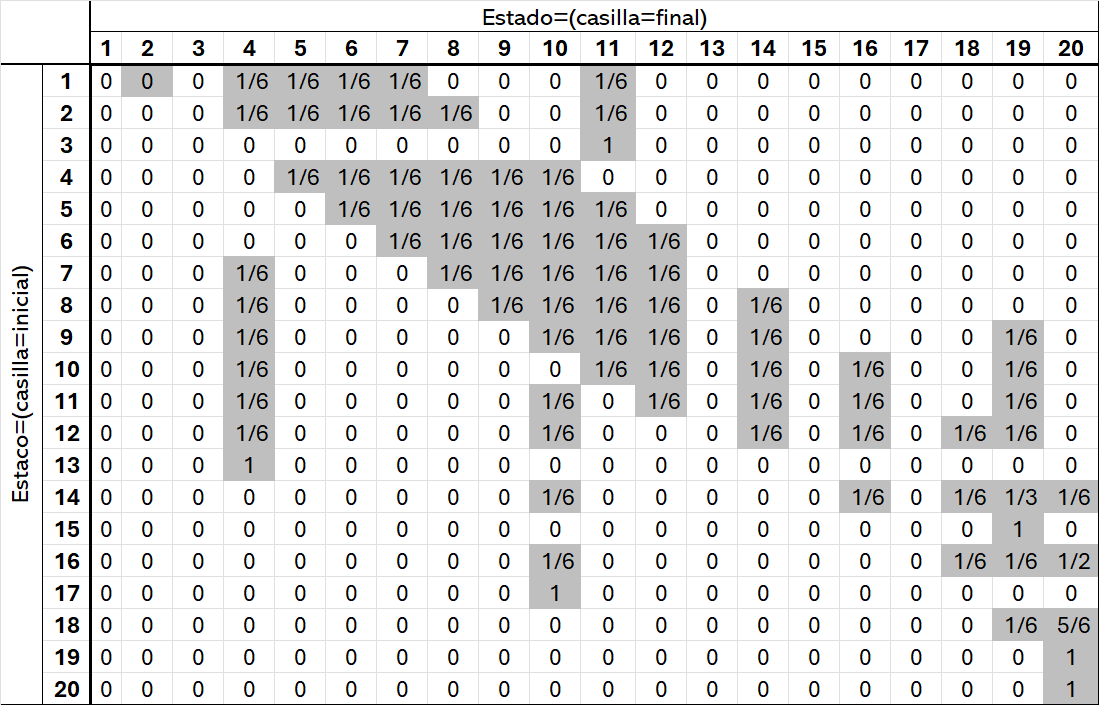

In [9]:
import numpy as np
import pandas as pd

# Cargar la matriz de transición desde el archivo Excel en Google Colab
# Asegúrate de haber subido el archivo a Colab
ruta_archivo = 'matriz.xlsx'  # nombre del archivo que subiste
df = pd.read_excel(ruta_archivo, header=None)
P = df.to_numpy()

# Asegúrate de que P es una matriz de 20x20
n = P.shape[0]

# Identificar los estados absorbentes (en este caso, la casilla 20)
absorbing_state = n - 1  # estado 20 (índice 19)
Q = P[np.arange(n) != absorbing_state][:, np.arange(n) != absorbing_state]

# Identificar los estados no absorbentes
non_absorbing_states = np.arange(n - 1)

# Calcular el tiempo de absorción
I = np.eye(Q.shape[0])  # Matriz identidad de tamaño Q
N = np.linalg.inv(I - Q)  # Matriz de absorción

# Sumar las filas de N para obtener el tiempo esperado de absorción desde cada estado
expected_times = N.sum(axis=1)

# Obtener el tiempo promedio desde el estado inicial (casilla 1, índice 0)
tiros_promedio = expected_times[0]  # tiempo promedio desde la casilla 1
print(f'Número promedio de tiros para llegar a la casilla 20: {tiros_promedio}')


Número promedio de tiros para llegar a la casilla 20: 6.898346651197905


# SOLUCIÓN POR SIMULACION

In [17]:
import random
import numpy as np

In [33]:
# EXPERIMENTOS
def exp(n):
  serpientes = {13: 4, 17: 10}
  escaleras = {3: 11, 15: 19}
  lista=[]
  for i in range(n):
    posicion = 0
    tiros = 0
    while posicion < 20:
        dado = random.randint(1, 6)   #Tiro al azar del dado
        tiros += 1                    #Numero de tiros +1
        posicion += dado              #Guarda la posicion
        if posicion in serpientes:              #Casillas de serpiestes y escalera
            posicion = serpientes[posicion]
        elif posicion in escaleras:
            posicion = escaleras[posicion]
    lista.append(tiros)
    return np.mean(tiros)                       #DEvuelve numero de tiros

In [34]:
# SIMULACIÓN
def simulacion(num_simulaciones):
    tiros_totales = []                        #Guarda número de tiros
    for _ in range(num_simulaciones):
        tiros_totales.append(exp(50))         #Almacena la media de 50 experimentos
    promedio_tiros = np.mean(tiros_totales)   #Media de tiros totales en la simulación
    return promedio_tiros

In [36]:
promedio = simulacion(1000)
print(f"El promedio de tiros necesarios es: {promedio:.2f}")

El promedio de tiros necesarios es: 7.02
